# Importing Libraries

In [1]:
!pip install k-means-constrained

     |████████████████████████████████| 563kB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 27.4MB 122kB/s 
     |████████████████████████████████| 14.4MB 212kB/s 
  Using cached https://files.pythonhosted.org/packages/a5/42/560d269f604d3e186a57c21a363e77e199358d054884e61b73e405dd217c/numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
     |████████████████████████████████| 1.0MB 40.2MB/s 
  Created wheel for k-means-constrained: filename=k_means_constrained-0.6.0-cp37-cp37m-linux_x86_64.whl size=1410270 sha256=2c98e150435d9e43cb7749a8926f2bf8f930e27dce3a7d32c00357ae7bebee21
  Stored in directory: /root/.cache/pip/wheels/6f/6e/54/6813085082d26fc9408573e64dc29363e798ecbfd02d4c9390
Successfully built k-means-constrained
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascien

In [2]:
#for data frame processing
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# for 3D projection
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

#for clustering
from sklearn.cluster import KMeans
from scipy.spatial import distance
from k_means_constrained import KMeansConstrained
from sklearn.neighbors import NearestNeighbors


#Loading Data

In [3]:
#uploading csv from local computer
from google.colab import files
upload=files.upload()

Saving merged_dataset_large.csv to merged_dataset_large.csv


In [4]:
#reading csv file using pandas
df=pd.read_csv('merged_dataset_large.csv') 


#Examining and Learning about the features of the dataframe

In [5]:
#getting general idea about data frame (df)
df.describe()

Energy_kcal    Protein_g  ...      Zinc_mg    Footprint
count  2191.000000  2191.000000  ...  2191.000000  2191.000000
mean    220.518221     8.075275  ...     1.184684     3.692460
std     180.086933     8.879474  ...     1.766126     5.528396
min       0.000000     0.000000  ...     0.000000     0.153790
25%      70.000000     1.400000  ...     0.170000     0.971222
50%     185.000000     4.825000  ...     0.550000     1.748667
75%     327.000000    12.028750  ...     1.450000     3.818505
max     902.000000    85.600000  ...    18.750000    71.392768

[8 rows x 24 columns]

In [6]:
df.head()

FullName  Energy_kcal  ...               Item  Footprint
0   agave cooked southwest   135.000000  ...  mixed fish frozen   1.040000
1    agave dried southwest   341.000000  ...        yeast dried   3.294000
2      agave raw southwest    68.000000  ...       yogurt plain   2.095343
3  alcoholic beverage wine    83.133333  ...         wine white   0.744100
4   alfalfa seeds sprouted    23.000000  ...     sunflower seed   1.159500

[5 rows x 26 columns]

In [7]:
#to know data types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FullName       2191 non-null   object 
 1   Energy_kcal    2191 non-null   float64
 2   Protein_g      2191 non-null   float64
 3   Fat_g          2191 non-null   float64
 4   Carb_g         2191 non-null   float64
 5   Sugar_g        2191 non-null   float64
 6   Fiber_g        2191 non-null   float64
 7   VitA_mcg       2191 non-null   float64
 8   VitB6_mg       2191 non-null   float64
 9   VitB12_mcg     2191 non-null   float64
 10  VitC_mg        2191 non-null   float64
 11  VitE_mg        2191 non-null   float64
 12  Folate_mcg     2191 non-null   float64
 13  Niacin_mg      2191 non-null   float64
 14  Riboflavin_mg  2191 non-null   float64
 15  Thiamin_mg     2191 non-null   float64
 16  Calcium_mg     2191 non-null   float64
 17  Copper_mcg     2191 non-null   float64
 18  Iron_mg 

In [8]:
#convert all data types to float
cols = ['Energy_kcal', 'VitA_mcg', 'Folate_mcg', 'Calcium_mg','Magnesium_mg', 'Phosphorus_mg']
for col in cols:
   df[col] = df[col].apply(lambda x: float (x) if x == x else "")

In [9]:
#checking data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FullName       2191 non-null   object 
 1   Energy_kcal    2191 non-null   float64
 2   Protein_g      2191 non-null   float64
 3   Fat_g          2191 non-null   float64
 4   Carb_g         2191 non-null   float64
 5   Sugar_g        2191 non-null   float64
 6   Fiber_g        2191 non-null   float64
 7   VitA_mcg       2191 non-null   float64
 8   VitB6_mg       2191 non-null   float64
 9   VitB12_mcg     2191 non-null   float64
 10  VitC_mg        2191 non-null   float64
 11  VitE_mg        2191 non-null   float64
 12  Folate_mcg     2191 non-null   float64
 13  Niacin_mg      2191 non-null   float64
 14  Riboflavin_mg  2191 non-null   float64
 15  Thiamin_mg     2191 non-null   float64
 16  Calcium_mg     2191 non-null   float64
 17  Copper_mcg     2191 non-null   float64
 18  Iron_mg 

#Normalizing data

In [10]:
"""
* preparing data for normalization to keep values between 0 and 1
* using MinMaxScaler class available in the Scikit-learn library
* min-max approach rescales the feature to a fixed range of [0,1]
* Xnorm = X - Xmin / Xmax - Xmin
"""
#selecting numerical values in df only
df_num = df.select_dtypes(include=[np.number]) 
#to keep Footprint value out of normalization
df_num_1 = df_num.drop(['Footprint'], axis = 1)
#verifying changes
df_num_1.head()

Energy_kcal  Protein_g  Fat_g  ...  Phosphorus_mg  Selenium_mcg    Zinc_mg
0   135.000000       0.99   0.29  ...       9.000000      0.200000   0.250000
1   341.000000       1.71   0.69  ...      37.000000      0.600000  12.100000
2    68.000000       0.52   0.15  ...       7.000000      0.400000   0.150000
3    83.133333       0.07   0.00  ...       1.533333      0.013333   0.009333
4    23.000000       3.99   0.69  ...      70.000000      0.600000   0.920000

[5 rows x 23 columns]

In [11]:
"""
* Data normalization using MinMaxScaler
* To keep values between 0 and 1
* This is a better approach for clustering
"""
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_num_1 = pd.DataFrame(scaler.fit_transform(df_num_1), columns=df_num_1.columns)

#assign normalized values back to the original df
df[df_num_1.columns] = df_num_1

#verifying changes
df.head()

FullName  Energy_kcal  ...               Item  Footprint
0   agave cooked southwest     0.149667  ...  mixed fish frozen   1.040000
1    agave dried southwest     0.378049  ...        yeast dried   3.294000
2      agave raw southwest     0.075388  ...       yogurt plain   2.095343
3  alcoholic beverage wine     0.092166  ...         wine white   0.744100
4   alfalfa seeds sprouted     0.025499  ...     sunflower seed   1.159500

[5 rows x 26 columns]

#Data visualization

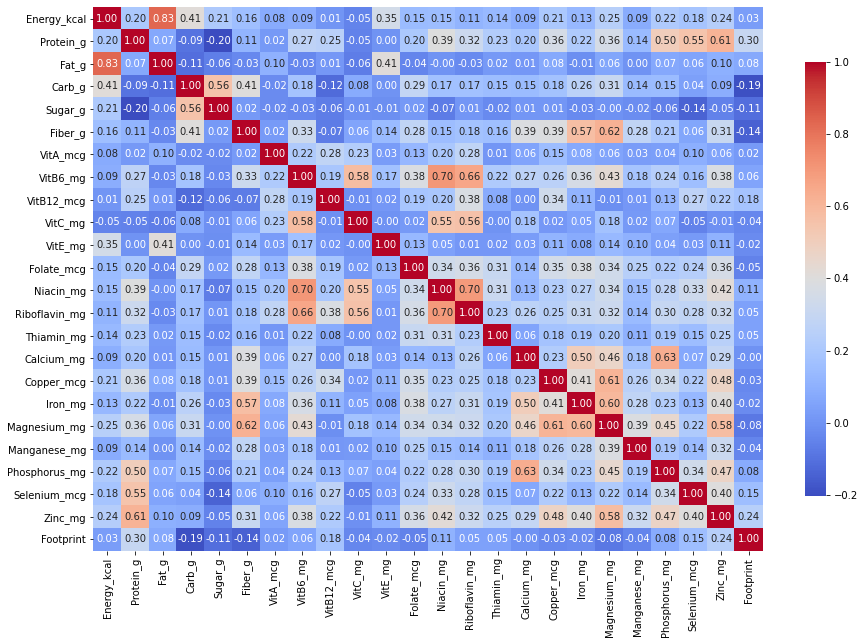

In [12]:
#displaying data frame in Axes
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, 
            fmt = ".2f", 
            cmap = 'coolwarm',
            cbar_kws = {"shrink": .8})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e9345c1d0>,
      dtype=object)

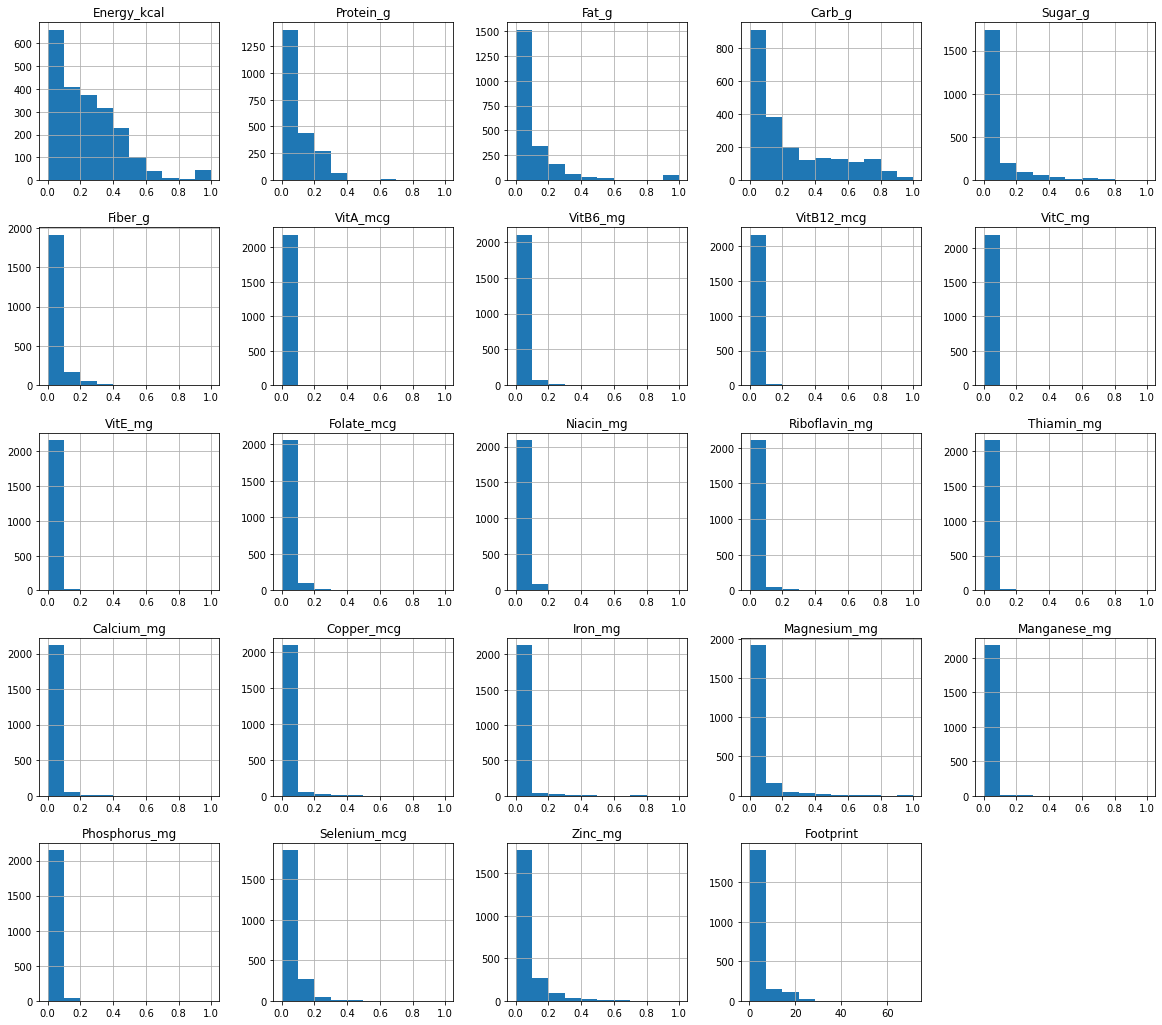

In [13]:
#displaying distribution of all nutritions in items
plt.rcParams["figure.figsize"] = (20, 18)
df.hist()

Text(0.5, 1.0, 'Carbon footprint distribution of food items')

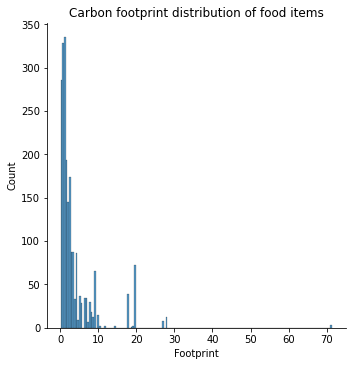

In [14]:
#closer look at footprint  distribution in items
sns.displot(df, x='Footprint')
plt.title("Carbon footprint distribution of food items")

In [15]:
#displaying nutrition to footprint relation for all items
data = df.drop(['FullName', 'Item', 'Footprint'], axis = 1)
for dato in data:
    fig = px.scatter(df, x = 'Footprint', y = dato,
                    size = dato, color = 'Item')
    fig.show()

#K-means Clustering
**1. Elbow method to find optimal K number of clsters**

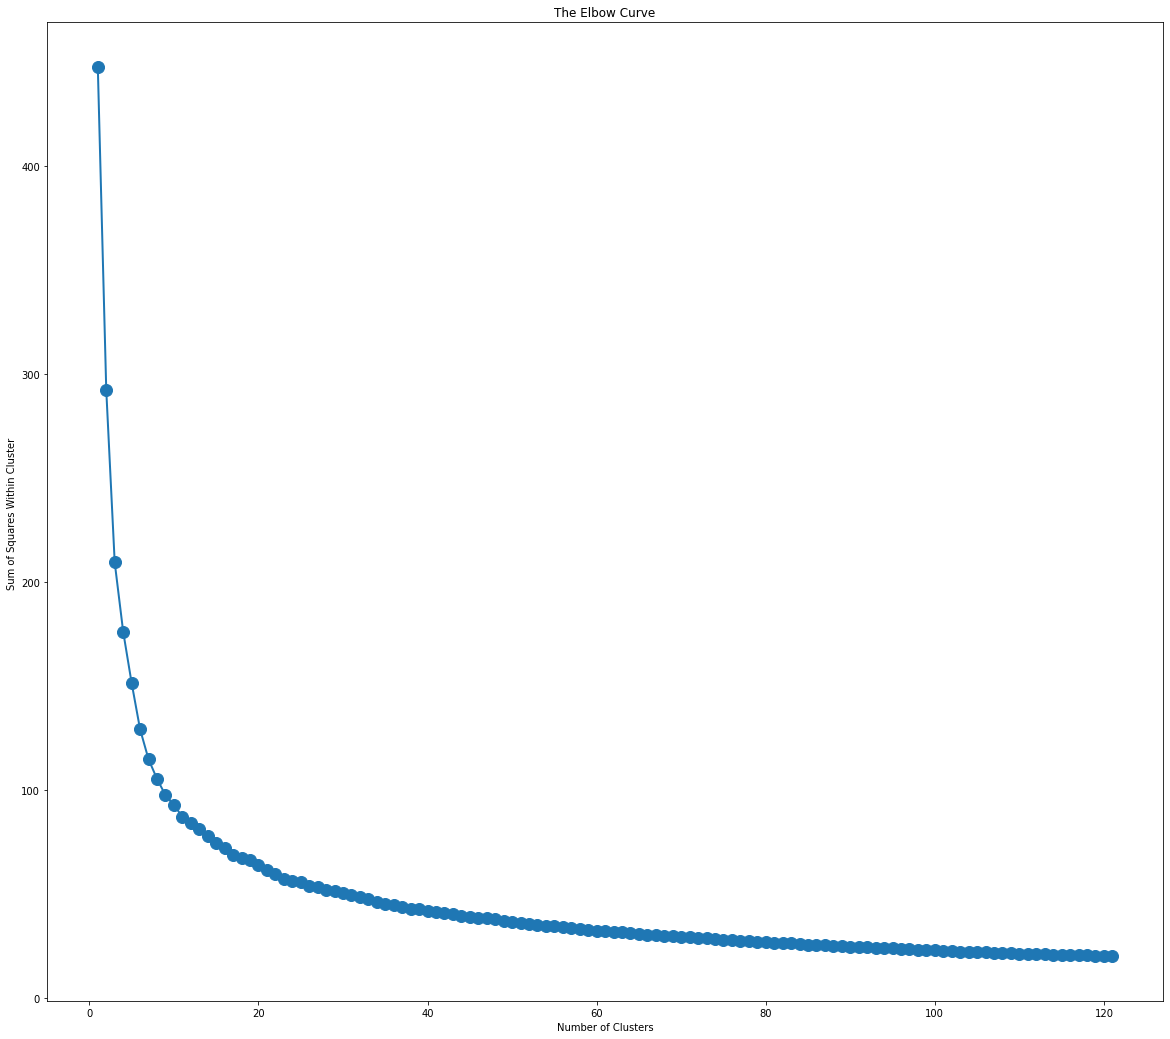

In [16]:
"""
KMeans clustering arguments

* WCSS: ( Within-Cluster Sum of Square distance between each point and the centroid in a cluster)
* n_clusters: is number of clusters decided by elbow method
* init: is the method for initializing the centroid
* k-means++: for smarter initialization of centroids
* max_iter: maximum number of iterations of the k-means algorithm for a single run
* n_init: Number of time the k-means algorithm will be run with different centroid seeds (defult is 10)
* random_state: determines random number generation for centroid initialization
"""

#droping features we do not want to cluster based on
# X1 has the clustering features (Energy_kcal, Protein_g, Fat_g, Carb_g, Sugar_g, Fiber_g, Calcium_mg, Iron_mg, Magnesium_mg, VitC_mg)

X1 = df.drop(['FullName','Item', 'Footprint', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg','VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Copper_mcg', 'Manganese_mg', 'Phosphorus_mg'], axis = 1)

#using the Elbow method to find the optimal K value (number of clsters).
wcss = []
for i in range(1,122):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=10,n_init=10,random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

#plot the WCSS with K value
#the plot looks like an Elbow. 
#As the number of clusters increases, the WCSS value will start to decrease
#The point at which the elbow shape is created is 4, that is, our K value or an optimal number of clusters is 4.

plt.plot(range(1,122),wcss, linewidth = 2, markersize = 12, marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Within Cluster ')
plt.savefig('elbow.png')
plt.show()

#K-means Clustering
**2. KMeansConstrained with:**

## a. min max cluster size 
## b. k-means++ for smarter initialization of centroids

In [19]:
kmeans = KMeansConstrained(n_clusters=122, size_min=8, size_max=18, init='k-means++', n_init=10, max_iter=50, verbose=False, tol=1e-4, random_state=42)
kmeans.fit_predict(X1)

array([47, 99, 86, ..., 97, 34, 23], dtype=int32)

In [20]:
#Printing centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[0.1262421  0.05258524 0.02912593 ... 0.01013179 0.00082759 0.00685432]
 [0.18745425 0.22408387 0.09622536 ... 0.02691827 0.02687143 0.07117926]
 [0.04463626 0.00660325 0.00419762 ... 0.00497846 0.00052249 0.00234074]
 ...
 [0.05554016 0.008852   0.00300093 ... 0.01375215 0.00164406 0.00522716]
 [0.17076331 0.2961916  0.05163841 ... 0.02914118 0.08496023 0.06212575]
 [0.19711136 0.0193114  0.07421574 ... 0.00997552 0.00675868 0.01128395]]


#Visualizing Clusters

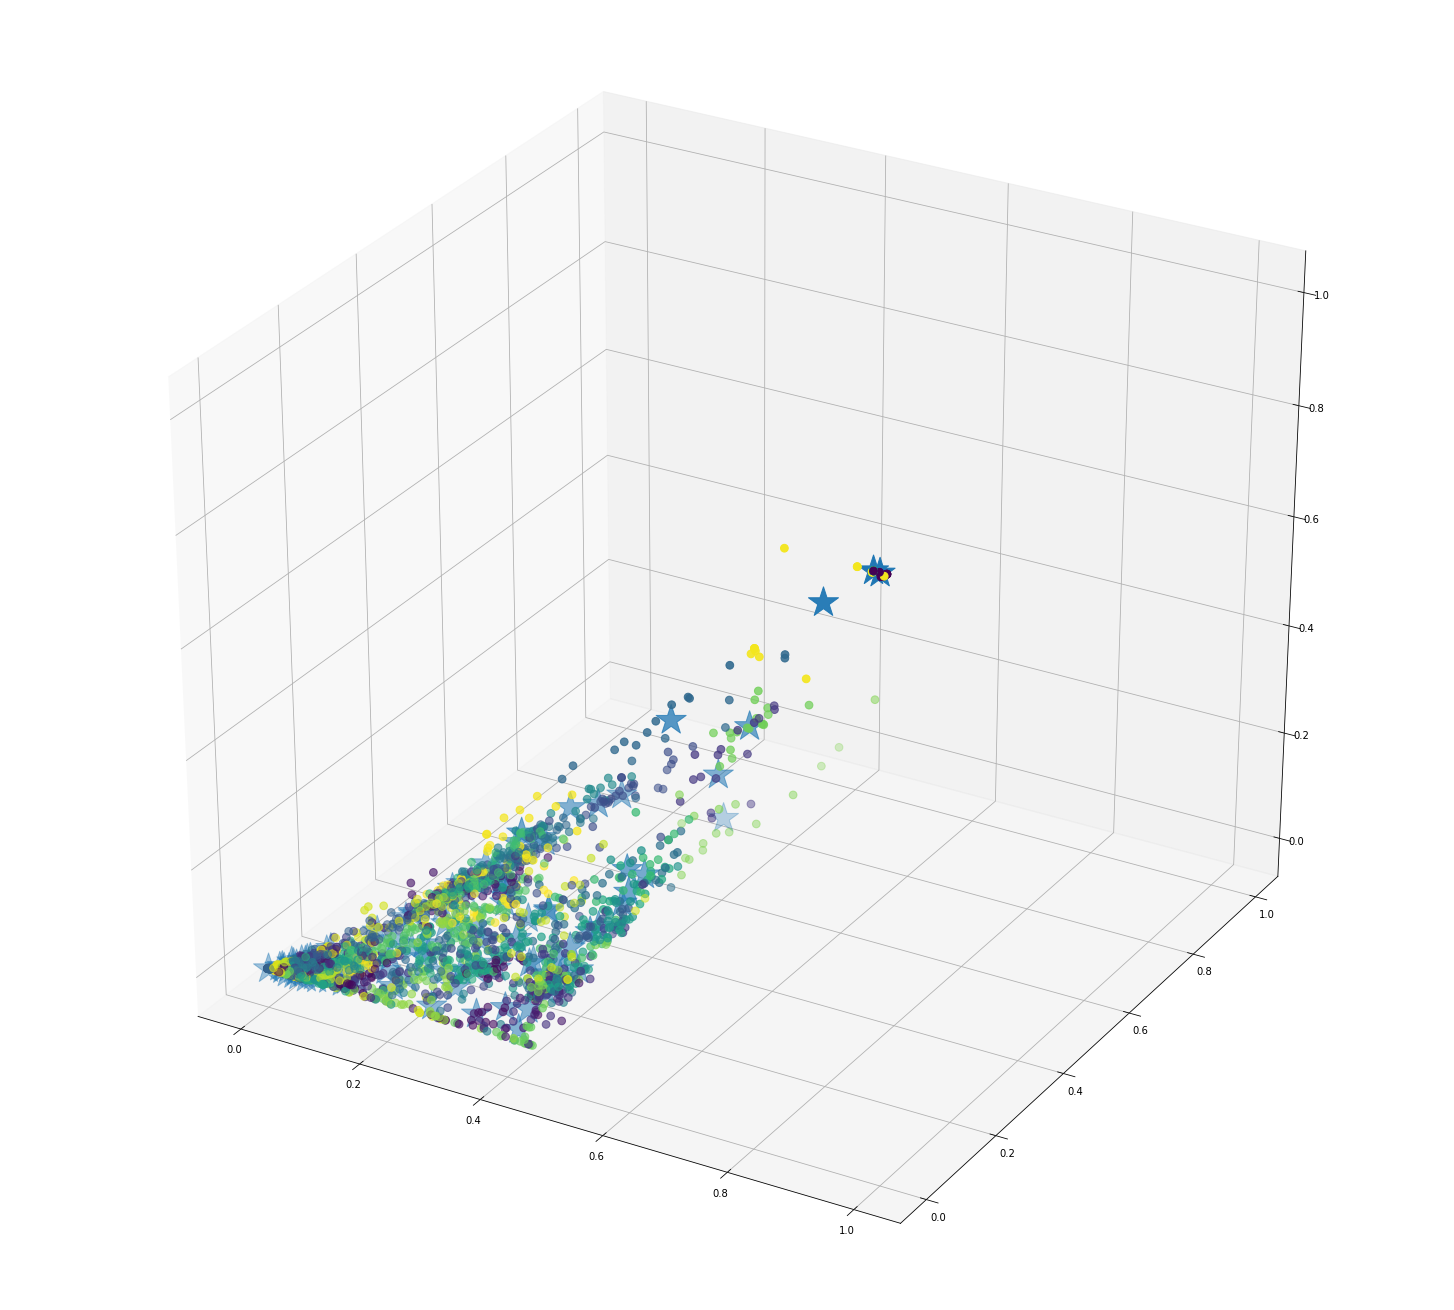

In [21]:
labels = kmeans.predict(X1)
C = kmeans.cluster_centers_
colors = list(np.random.choice(range(256), size=122))
#colors = ['red', 'cornsilk', 'green', 'yellow', 'orange', 'black', 'gray', 'pink', 'purple', 'teal', 'cyan', 'olive', 'brown', 'white', 'tomato', 'teal', 'firebrick', 'violet', 'sienna', 'peru', 'tan', 'beige', 'lavender', 'bisque', 'silver', 'gold', 'chocolate', 'lightpink', 'crimson', 'hotpink', 'plum', 'ivory', 'salmon', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
assign = []

for row in labels:
    assign.append(colors[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1.iloc[:, 0], X1.iloc[:, 1], X1.iloc[:, 2], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

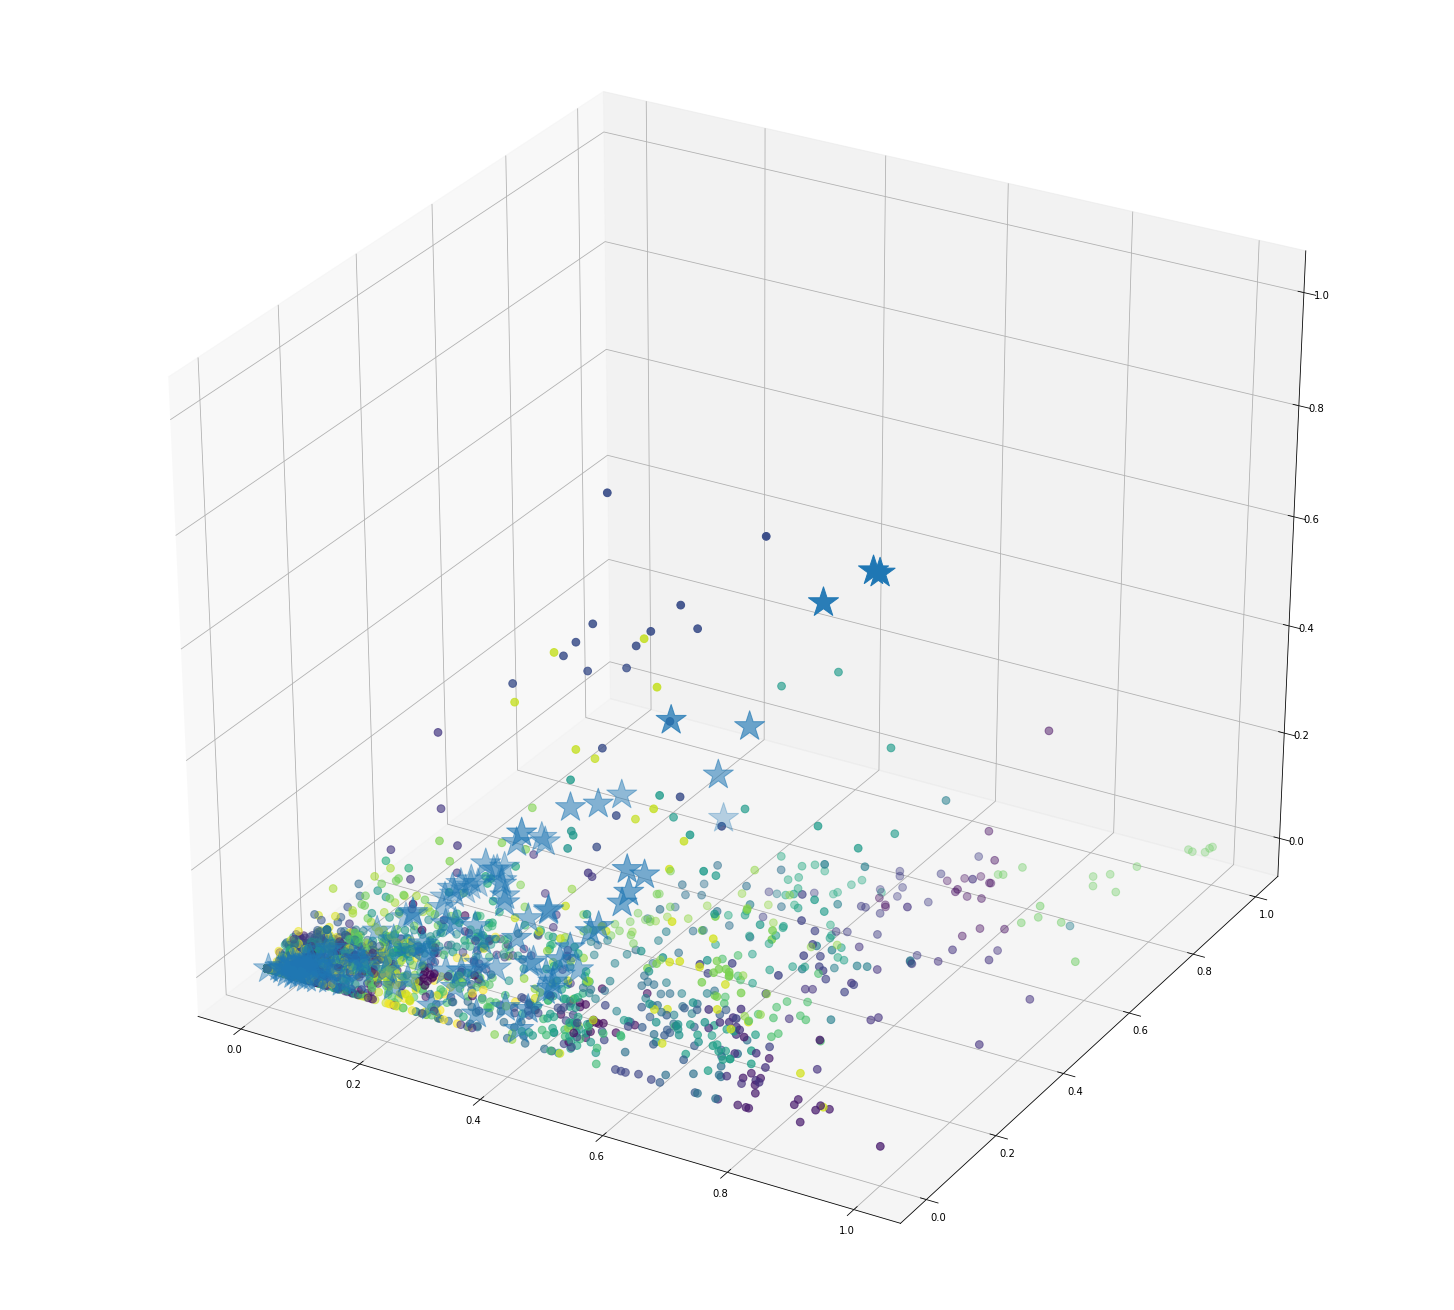

In [22]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1.iloc[:, 3], X1.iloc[:, 4], X1.iloc[:, 5], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

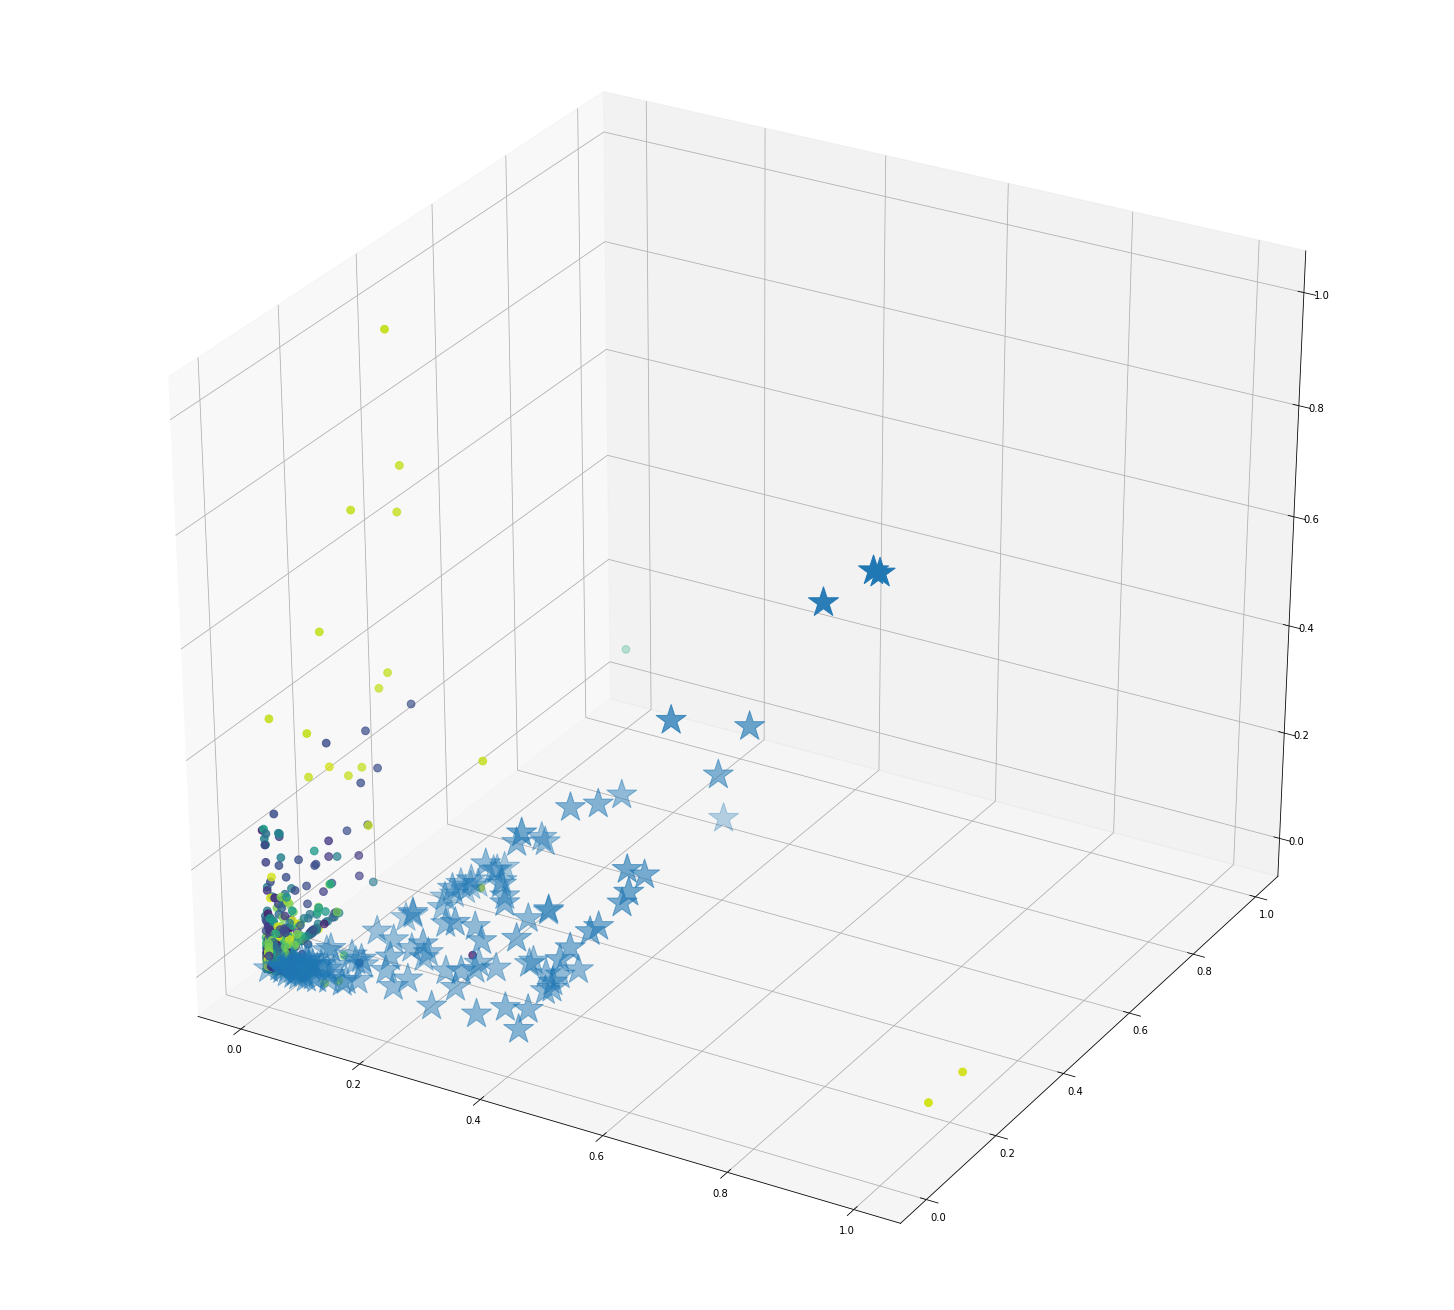

In [23]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1.iloc[:, 6], X1.iloc[:, 7], X1.iloc[:, 8], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

In [24]:
#showing how many items per colour
copy = pd.DataFrame()
copy['Item'] = df['Item'].values
copy['Footprint'] = df['Footprint'].values
copy['label'] = labels
amount = pd.DataFrame()
amount['color'] = colors
amount['amount'] = copy.groupby('label').size()
amount

color  amount
0       31      18
1      164      18
2      175      18
3        2      18
4      145      18
..     ...     ...
117     62      18
118     18      18
119     83      18
120    183      18
121    238      18

[122 rows x 2 columns]

In [25]:
#compiling data frame with new values

#adding cluster_ID column to X1
X1['Cluster_ID'] = pd.DataFrame(kmeans.labels_)

#assign values back to the original df
df[X1.columns] = X1

#saving df to csv
df.to_csv('merged_dataset_large.csv')

#to show number of items in each cluster
df['Cluster_ID'].value_counts()

121    18
60     18
64     18
66     18
68     18
       ..
51     18
53     18
101    17
99     16
57     16
Name: Cluster_ID, Length: 122, dtype: int64

#User's console view

In [28]:
df.head()

FullName  Energy_kcal  ...  Footprint  Cluster_ID
0   agave cooked southwest     0.149667  ...   1.040000          47
1    agave dried southwest     0.378049  ...   3.294000          99
2      agave raw southwest     0.075388  ...   2.095343          86
3  alcoholic beverage wine     0.092166  ...   0.744100          63
4   alfalfa seeds sprouted     0.025499  ...   1.159500          70

[5 rows x 27 columns]

In [33]:
food_choice = input("Enter a Food Item: ")

Enter a Food Item: beef rib


In [34]:
def recomandation(food_choice):
  try:
    food_choice = food_choice.lower()
    df_user_choice = df.loc[df['FullName'] == food_choice]
    user_choice_carbon_footprint = float(df_user_choice['Footprint'])
    df_same_cluster = df.loc[df['Cluster_ID'] == int(df_user_choice['Cluster_ID'])]
    df_lower_CFP = df_same_cluster.loc[df_same_cluster['Footprint'] < user_choice_carbon_footprint].sort_values(["Footprint"], ascending=True)
    if len(df_lower_CFP) == 0:
      print('Great choice!')
    else:
      print(food_choice + ': has a carbon footprint of {} GHG'.format('%.2f'%user_choice_carbon_footprint))
      print('\n')
      print('Here is a list of items with lower carbon footprint:')
      print('\n')
      print(df_lower_CFP[['FullName', 'Footprint']][0:5])
  except:
    print('Sorry, we do not know this item. Try an other name')

recomandation(food_choice)

beef rib: has a carbon footprint of 19.54 GHG


Here is a list of items with lower carbon footprint:


                           FullName  Footprint
1540                   quail cooked   1.040000
2044  turkey and pork sausage fresh   2.075000
2057                turkey enhanced   2.075000
2046        turkey bacon microwaved   4.025000
991                     lamb ground   5.129286
